In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
%cd yolov5
%pip install -r requirements.txt
%pip uninstall wandb -qy
import torch

from IPython.display import Image, clear_output

In [ ]:
from roboflow import Roboflow
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("ROBOFLOW_API_KEY")

rf = Roboflow(api_key=api_key)

project = rf.workspace("semaphore-signals").project("deteksi-huruf-alfabet")
version = project.version(1)

dataset = version.download("yolov5")

In [9]:
# Training
%time
!python train.py --img 416 --batch 32 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --name yolov5s_results --exist-ok --cache

CPU times: total: 0 ns
Wall time: 0 ns
[WinError 3] The system cannot find the path specified: '/content/yolov5/'
c:\Users\Jhudiel\OneDrive\Documents\Programming\Python\semaphore-machine-learning\yolov5


train: weights=yolov5s.pt, cfg=, data=c:\Users\Jhudiel\OneDrive\Documents\Programming\Python\semaphore-machine-learning\yolov5\Deteksi-Huruf-Alfabet-1/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-383-g1435a8ee Python-3.11.10 torch-2.5.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, 

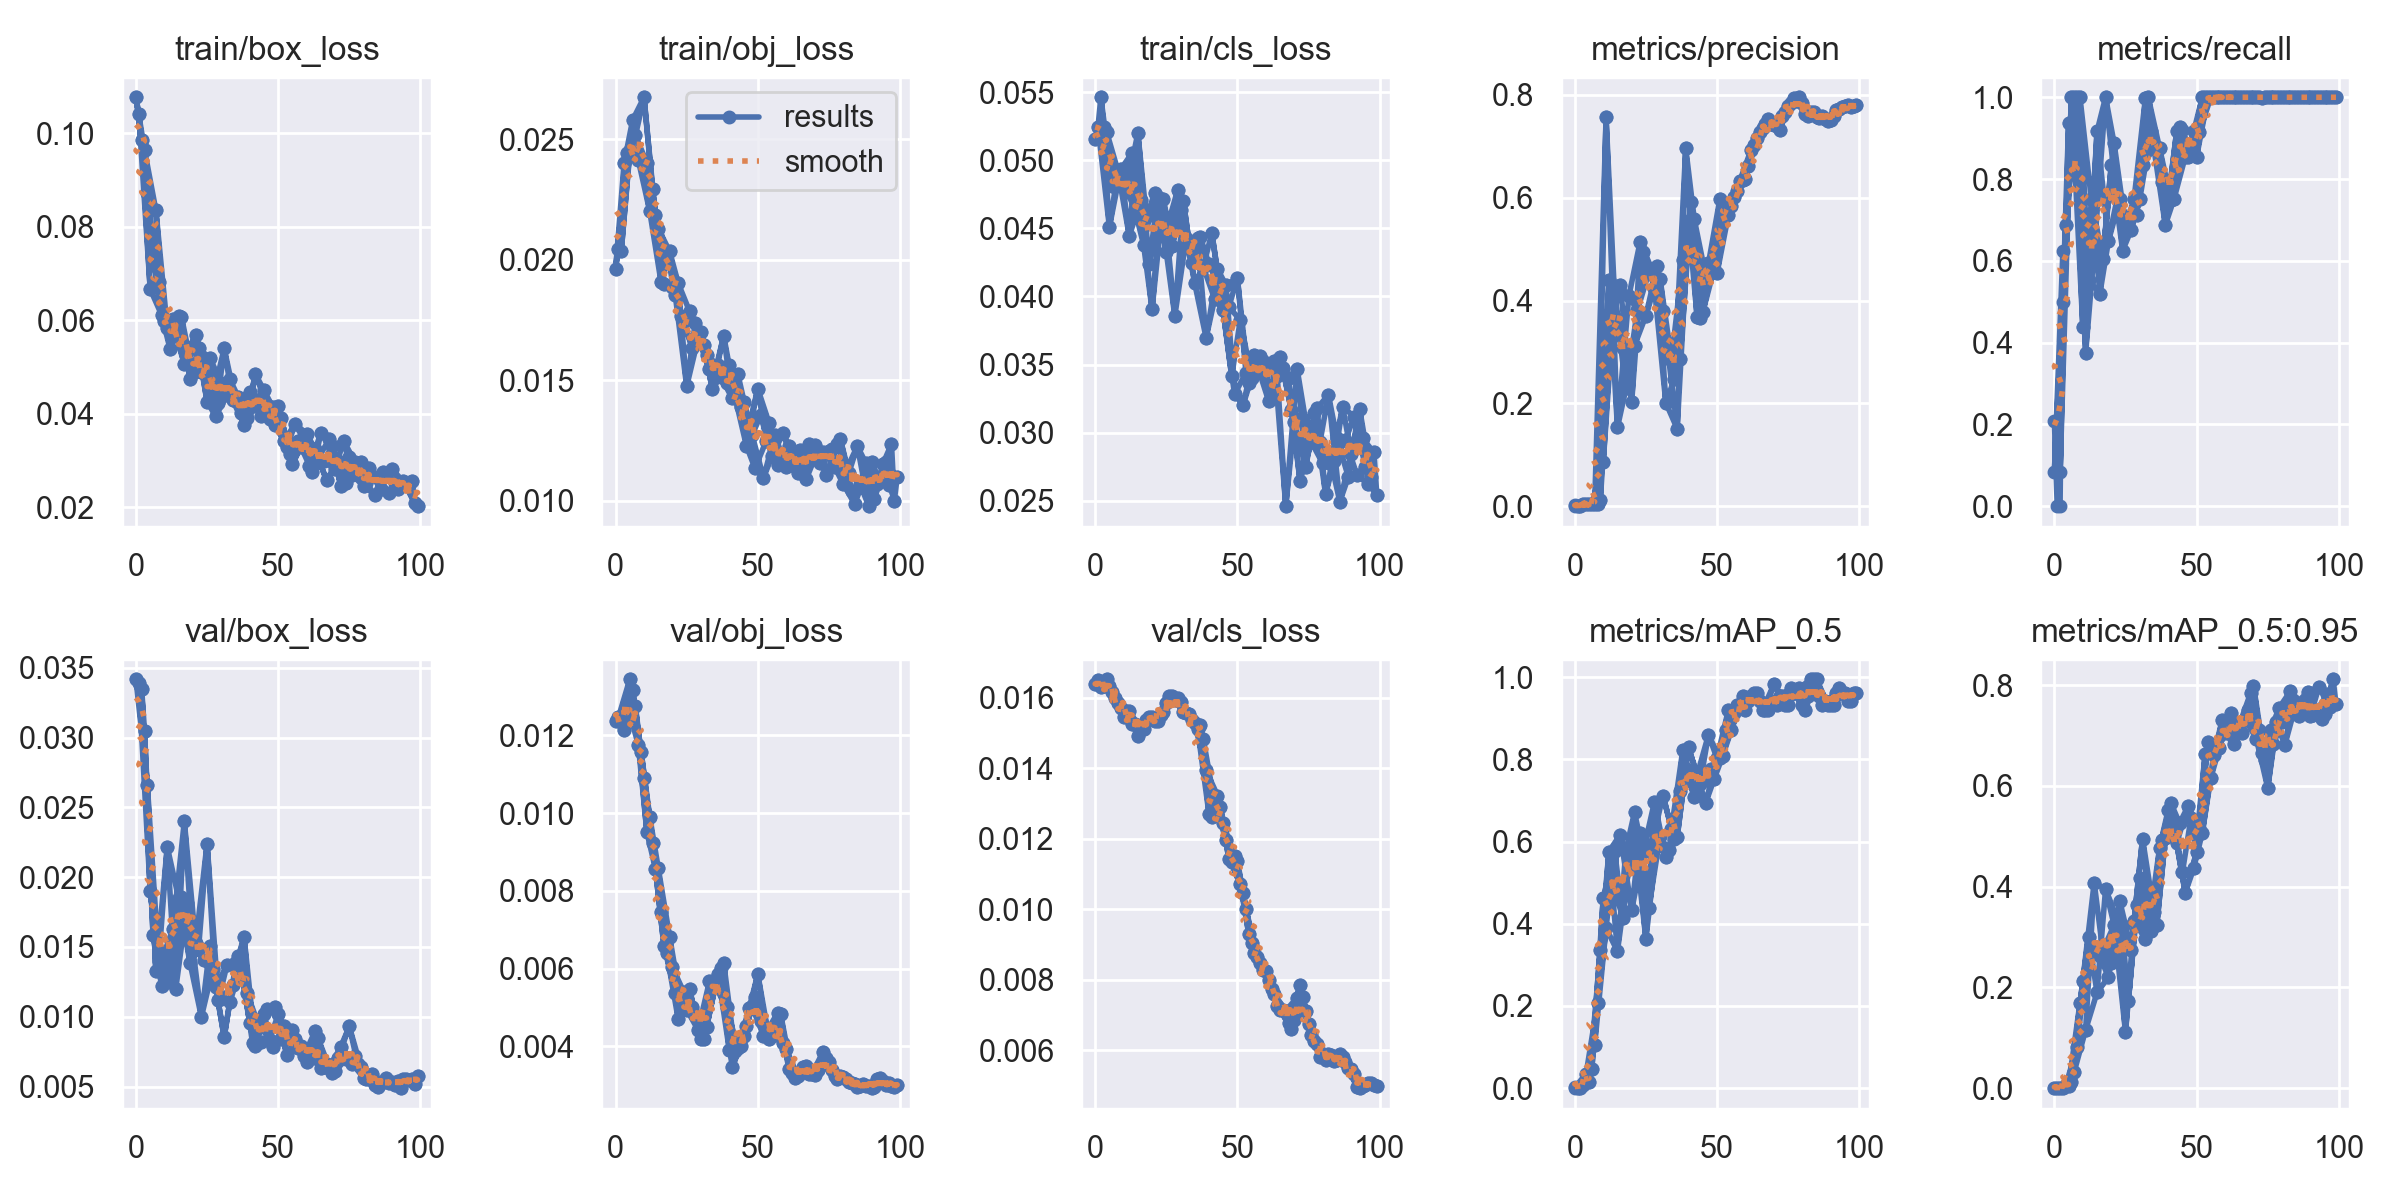

In [14]:
# Evaluation
from utils.plots import plot_results
Image(filename='runs/train/yolov5s_results/results.png', width=1000)

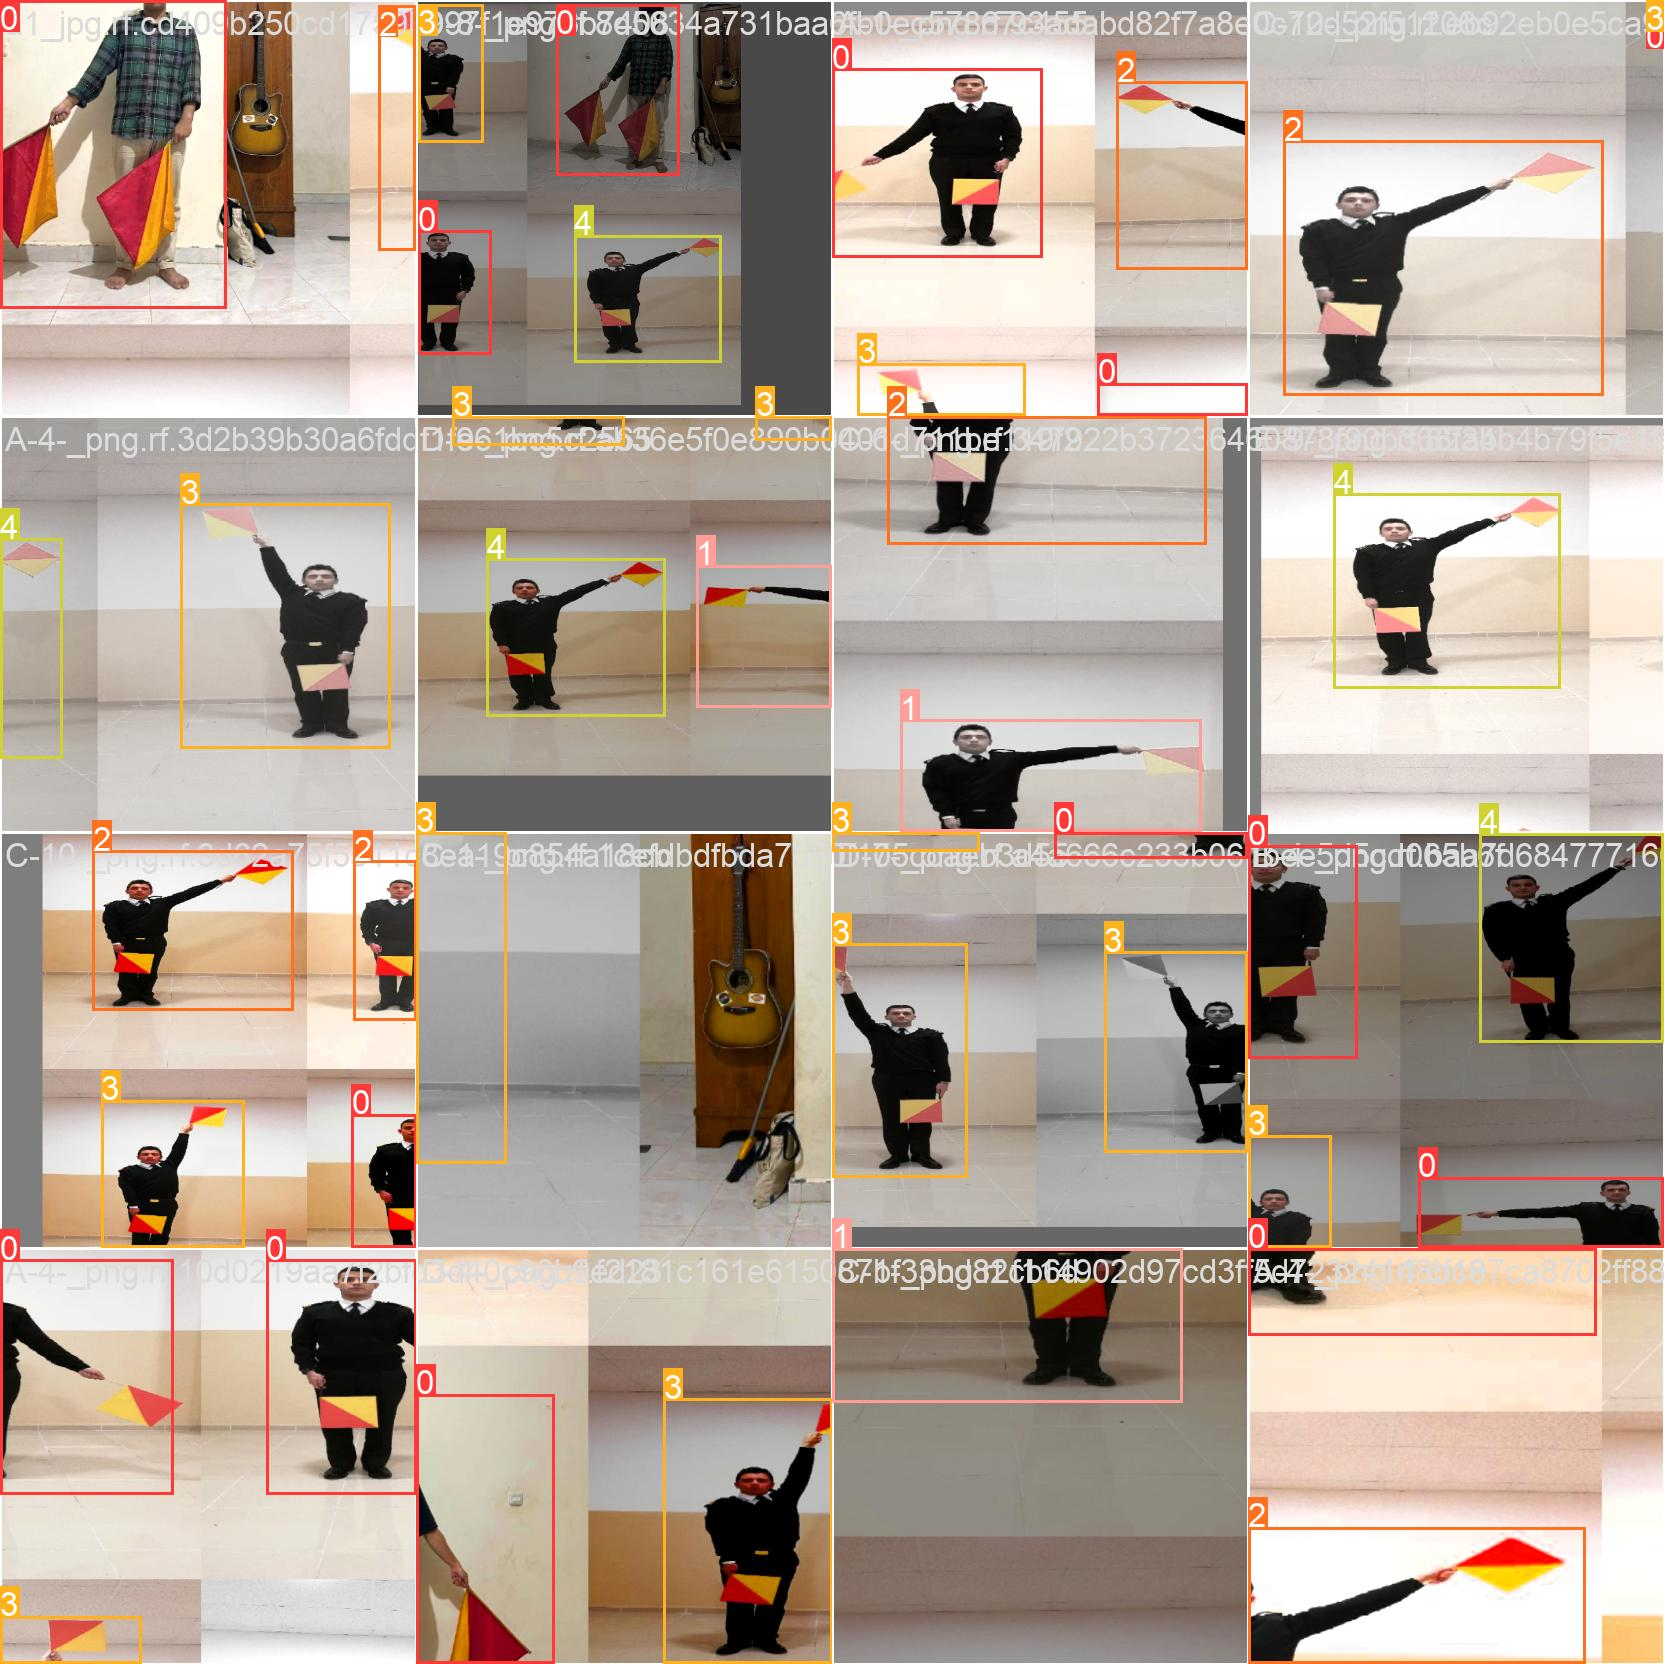

In [15]:
# Sample Augmented Training Images
Image(filename='runs/train/yolov5s_results/train_batch0.jpg', width=900)

In [9]:
# Inference on test images
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.35 --source {dataset.location}/test/images/ --project runs/detect --name exp --exist-ok

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=c:\Users\Jhudiel\OneDrive\Documents\Programming\Python\semaphore-machine-learning\yolov5\Deteksi-Huruf-Alfabet-1/test/images/, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2024-11-17 Python-3.11.10 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 C:\Users\Jhudiel\OneDrive\Documents\Programming\Python\semaphore-machine-learning\yolov5\Deteksi-Huruf-Alfabet-1\test\images\A-10-_png.rf.568d79b271f3bf67b64a86bbb31bb1a8.jpg: 416x416 1 A, 101.6ms
image 2/5 C:\Users\Jhudie

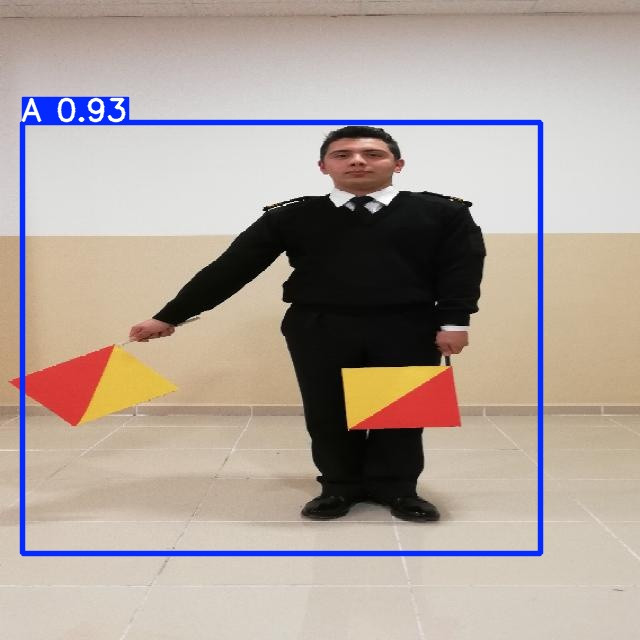

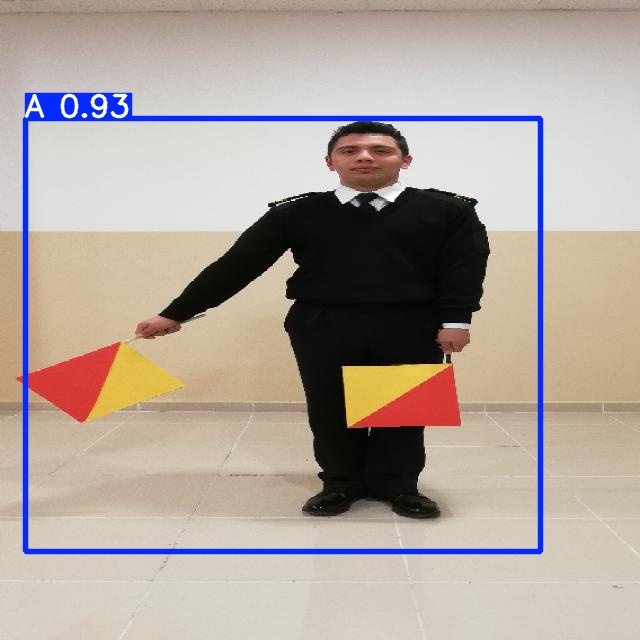

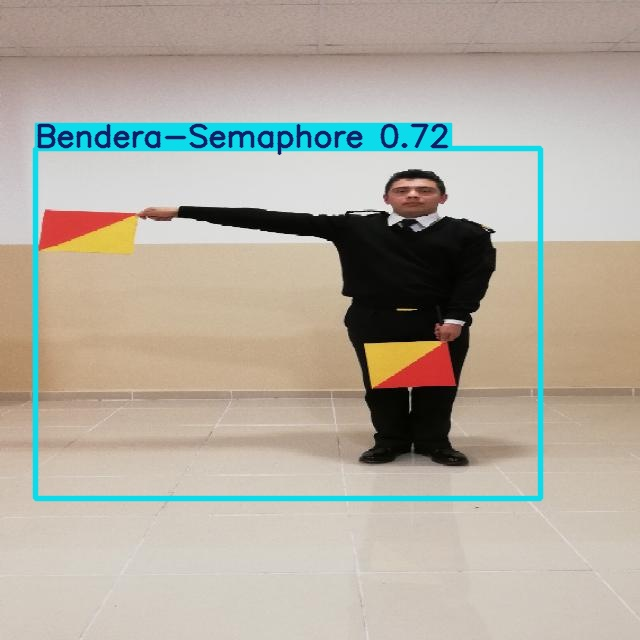

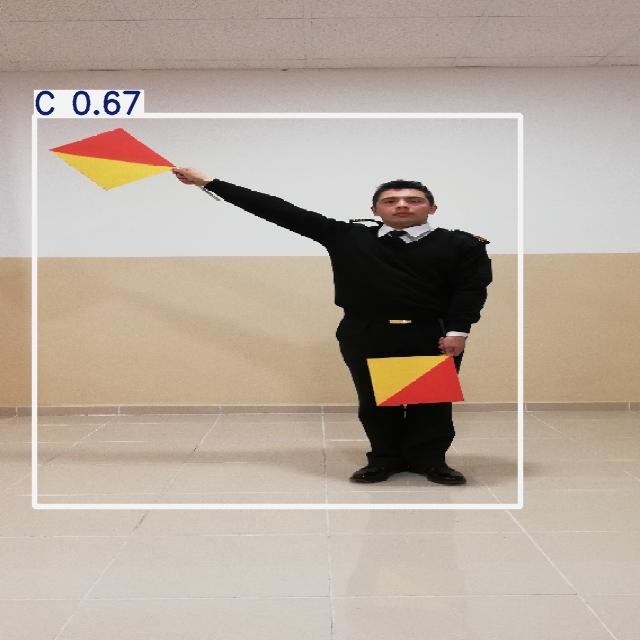

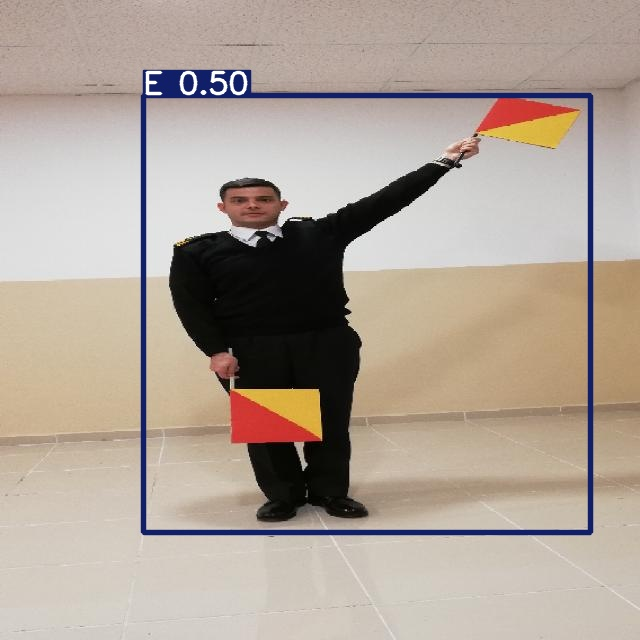

In [10]:
# Display
import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))